#                 STATIONARITY IN TIME SERIES ANALYSIS

In [16]:
import pandas as pd
import numpy as np
from pandas import Series
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pylab import rcParams
rcParams['figure.figsize']=20,7
import seaborn as sns
from statsmodels.tsa.stattools import adfuller


#### Importing data and filling missing values

In [2]:
df = pd.read_csv('D://T1.csv',parse_dates=True,index_col='Date/Time')
df=df.drop(['Theoretical_Power_Curve (KWh)'], axis = 1)

In [3]:
df=df.reindex(pd.date_range(start=df.index[0], end=df.index[-1], freq='10T'))
df = df.ffill().bfill()  

In [4]:
df.head()

,Wind Speed (m/s),LV ActivePower (kW),Wind Direction (°)
2018-01-01 00:00:00,5.311336,380.047790,259.994904
2018-01-01 00:10:00,5.672167,453.769196,268.641113
2018-01-01 00:20:00,5.216037,306.376587,272.564789
2018-01-01 00:30:00,5.659674,419.645904,271.258087
2018-01-01 00:40:00,5.577941,380.650696,265.674286


In [5]:
df1=df.drop(['LV ActivePower (kW)','Wind Direction (°)'], axis = 1)
df1.to_csv('D://df1.csv')

In [6]:
series = Series.from_csv('D://df1.csv', header=0)

C:\ProgramData\Anacondaa3\envs\tf\lib\site-packages\pandas\core\series.py:4141: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


## FINDING STATIONARITY OF THE DATA

### METHOD 1:ADF TEST(AUGMENTED DICKY FULLER TEST)

In this test, the p-value is calculated for the time series data.If  (p-value>0.05) then the data is non-stationary.

In [7]:
X = series.values
#result = adfuller(X)
result = adfuller(X,maxlag=6,regression='nc',)     

In [8]:
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -8.475616
p-value: 0.000000
Critical Values:
	1%: -2.566
	5%: -1.941
	10%: -1.617


Here the p-value is zero.(i.e)less than 0.05.Hence our time series data is stationary.

### METHOD 2:BY CHECKING THE POSSIBILITY OF TREND AND SEASONALITY

## Stationary Time Series

Time series are stationary if they do not have trend or seasonal effects.When a time series is stationary, it can be easier to model. Statistical modeling methods assume or require the time series to be stationary to be effective.However Machine Learning models need not require the time series data to be stationary. 

###### 1. TESTING THE PRESENCE OF TREND - ROLLING WINDOW METHOD

In Rolling windows method the data is split into time windows and and the data in each window is aggregated with a mean() function.

In [9]:
#storing the coloumn names in a list
data_columns=['Wind Speed (m/s)','LV ActivePower (kW)','Wind Direction (°)']

In [10]:
## Compute the centered 1-hour rolling mean
data_hour = df[data_columns].rolling(window=6, center=True).mean()
# Compute the centered 1-day rolling mean
data_daily=data_hour[data_columns].rolling(window=24, center=True).mean()
# Compute the centered 7-days rolling mean
data_weekly=data_daily[data_columns].rolling(window=7, center=True).mean()
#Compute the centered 365 days rolling mean
data_365 = data_daily[data_columns].rolling(window=365, center=True, min_periods=360).mean()

In [11]:
# Start and end of the date range to extract
start, end = '2018-01', '2018-12'
data_weekly_mean = data_daily[data_columns].resample('W').mean()


## PLOTTING THE TREND

The trend graph generated below depicts that there is no trend component in our time series data

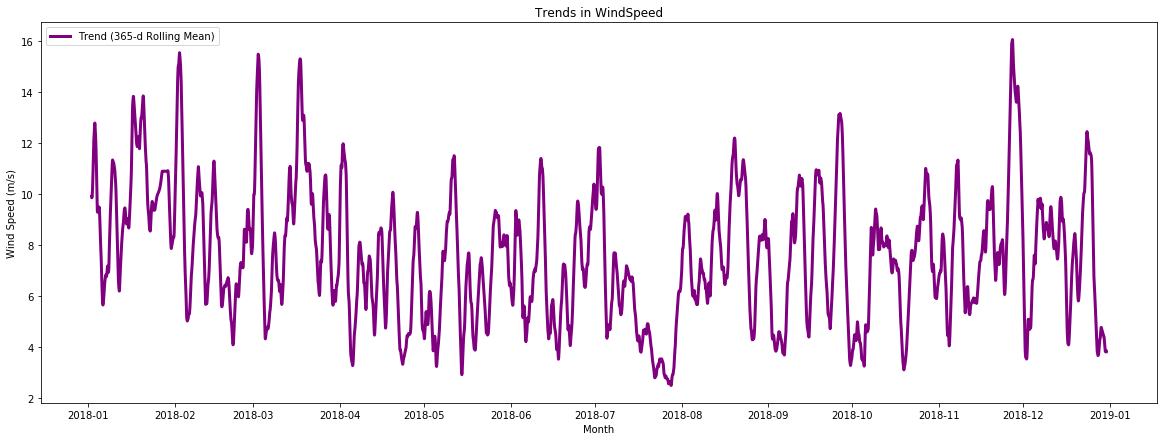

In [17]:
# Plot and 365-day rolling mean time series
fig, ax = plt.subplots()
ax.plot(data_365['Wind Speed (m/s)'], linewidth=3,color='purple',
label='Trend (365-d Rolling Mean)')
# Set x-ticks to yearly interval and add legend and labels
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.legend()
ax.set_xlabel('Month')
ax.set_ylabel('Wind Speed (m/s)')
ax.set_title('Trends in WindSpeed');

##### 2. TESTING THE PRESENCE OF SEASONALITY-BOX PLOT

In [13]:
#FINDING YEARLY SEASONALITY
data_daily['Month'] = data_daily.index.month
data_daily['Weekday Name'] = data_daily.index.weekday_name


## PLOTTING SEASONALITY

These box plots confirm that there is no seasonality.


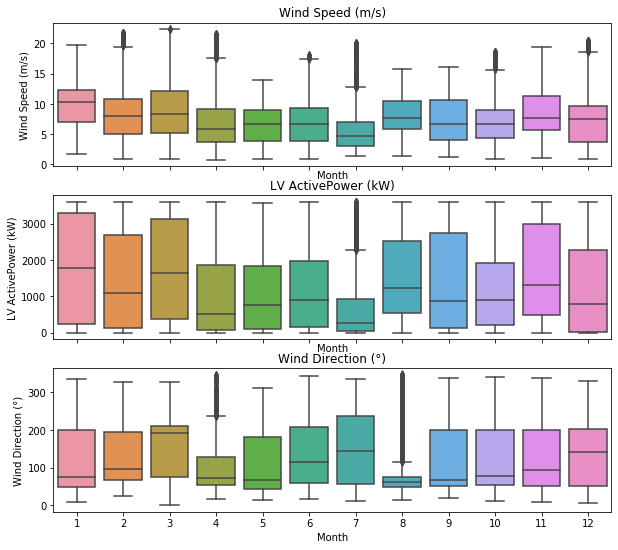

In [14]:
fig, axes = plt.subplots(3, 1, figsize=(10, 9), sharex=True)
for name, ax in zip(['Wind Speed (m/s)','LV ActivePower (kW)','Wind Direction (°)'], axes):
    sns.boxplot(data=data_daily, x='Month', y=name, ax=ax)
    #ax.set_ylabel('m/s')
    ax.set_title(name)
# Remove the automatic x-axis label from all but the bottom subplot
if ax != axes[-1]:
    ax.set_xlabel('')

The time series data is hence stationary (no trend and no seasonality) and can be used to perform statistical as well as machine learning analysis